In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [14]:
df=pd.read_excel('ENB2012_data.xlsx')

In [15]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [16]:
df = df.rename(columns = column_names)

In [17]:
#select the sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness','Cooling_Load']].sample(15, random_state = 2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

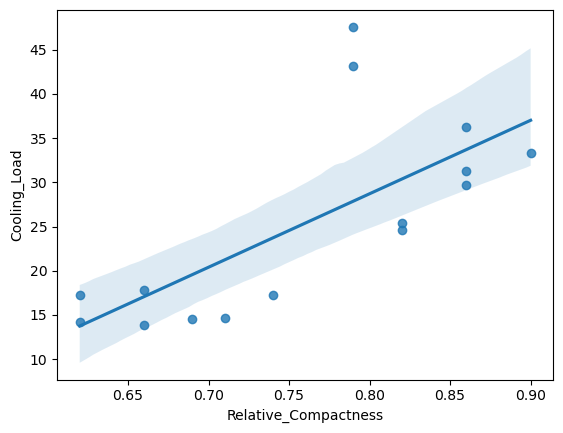

In [18]:
#regression Plot
sns.regplot(x = "Relative_Compactness", y = "Cooling_Load",
           data = simple_linear_reg_df)

# Measuring Regression Performance


## Mean Absolute Error (MAE)


In [19]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [27]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [26]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.063

## Residual Sum of Squares (RSS) 


In [28]:

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

## Root Mean Square Error (RMSE)

In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

## R-Squared 

In [30]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894